# Predictor de Apuestas deportivas

## Objetivo 

Predecir cantidades de tiros de esquina, goles y tarjetas amarillas del minuto 75 a final de un partido de fútbol de las principales ligas de Europa. Este modelo se basará en datos históricos de más de 5000 partidos para aprender patrones y características que indiquen la probabilidad de que se produzca cierta cantidad de tiros esquina en un momento dado del juego.

El proceso general implicara lo siguiente:


- Recopilar datos relevantes de partidos anteriores: Esto se realizo en script anterior en este enlace se podrá ver en el siguiente enlace: 
https://github.com/anderson-sarmiento-briceno/mi-portafolio/blob/main/Bot_Scraping_para_datos_futbol_v1.ipynb


- Procesamiento de datos: Este paso se realizo en Script anterior se puede ver en el siguiente enlace:
https://github.com/anderson-sarmiento-briceno/mi-portafolio/blob/main/Procesamiento_Datos_Puntos_v1.ipynb


- Limpieza de datos y Construcción de dataframe

- Análisis de datos

- Correlaciones

- Construcción de etiquetas

- Tratamiento de valores atípicos

- Balanceo de Etiquetas

- Aplicación Modelo Clasificador

- Modelo simple y multiclase

- Modelos robustos con ensamble 

- Aplicando Modelo Optimo Encontrado

- Conclusiones


In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
sns.set()
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib as mpl
from matplotlib import cycler
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")
plt.rc('figure', facecolor='#313233')

## Limpieza de datos y Construcción de dataframe

Dado que la información está en diferentes archivos csv que contienen información de diferentes ligas de Europa es necesario unirlos en uno solo para su procesamiento.

In [16]:
# Ruta de la carpeta que contiene los archivos CSV
carpeta = 'C:\\Users\\sandr\\OneDrive\\Escritorio\\phyton_2023\\10_futbol\\archivos_futbol\\data_frame_liga_procesados_para_modelo\\primera division_europa'

# Lista para almacenar los DataFrames de los archivos CSV
dfs = []

# Iterar sobre todos los archivos en la carpeta
for archivo in os.listdir(carpeta):
    if archivo.endswith('.csv'):
        # Leer el archivo CSV y almacenarlo en un DataFrame
        ruta_archivo = os.path.join(carpeta, archivo)
        df = pd.read_csv(ruta_archivo)
        dfs.append(df)
        
    print('finalizo el cargue')
df_final = pd.concat(dfs, ignore_index=True)

finalizo el cargue
finalizo el cargue
finalizo el cargue
finalizo el cargue
finalizo el cargue


In [17]:
df_final

,Jugador,Goals,Assists,Red cards,Yellow cards,Corners won,Shots,Shots on target,Blocked shots,Passes,...,minuto,localia,equipo,liga_fecha,inf_estadio,Temporadas,Fecha,col_comun,Posición,Gol_Dif_acum
0,Total,0,0,0,0,2,3,1,1,167,...,70_90,visitante,Arsenal FC,Premier League12 September 2020 06:30,"VenueCraven Cottage, RefereeChris Kavanagh",2020/2021,Matchday 1,Arsenal FC2020/2021Matchday 1,1.0,3.0
1,Total,3,2,0,2,1,10,5,2,459,...,0_70,visitante,Arsenal FC,Premier League12 September 2020 06:30,"VenueCraven Cottage, RefereeChris Kavanagh",2020/2021,Matchday 1,Arsenal FC2020/2021Matchday 1,1.0,3.0
2,Total,0,0,0,0,1,1,0,0,75,...,70_90,local,Fulham FC,Premier League12 September 2020 06:30,"VenueCraven Cottage, RefereeChris Kavanagh",2020/2021,Matchday 1,Fulham FC2020/2021Matchday 1,19.0,-3.0
3,Total,0,0,0,2,1,4,2,1,448,...,0_70,local,Fulham FC,Premier League12 September 2020 06:30,"VenueCraven Cottage, RefereeChris Kavanagh",2020/2021,Matchday 1,Fulham FC2020/2021Matchday 1,19.0,-3.0
4,Total,0,0,0,0,1,2,1,0,92,...,70_90,visitante,Southampton FC,Premier League12 September 2020 09:00,"VenueSelhurst Park, RefereeJonathan Moss",2020/2021,Matchday 1,Southampton FC2020/2021Matchday 1,11.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21907,Total,3,3,0,2,5,12,8,1,389,...,0_70,local,Reial Club Deportiu Espanyol,Primera División4 June 2023 14:00,"VenueStage Front Stadium, Attendance14,213, Re...",2022/2023,Matchday 38,Reial Club Deportiu Espanyol2022/2023Matchday 38,14.0,-15.0
21908,Total,0,0,0,1,0,0,0,0,28,...,70_90,visitante,Getafe CF,Primera División4 June 2023 14:00,"VenueEstadio Municipal José Zorrilla, Attendan...",2022/2023,Matchday 38,Getafe CF2022/2023Matchday 38,12.0,-7.0
21909,Total,0,0,0,2,1,4,1,1,129,...,0_70,visitante,Getafe CF,Primera División4 June 2023 14:00,"VenueEstadio Municipal José Zorrilla, Attendan...",2022/2023,Matchday 38,Getafe CF2022/2023Matchday 38,12.0,-7.0
21910,Total,0,0,0,0,2,4,0,0,129,...,70_90,local,Real Valladolid CF,Primera División4 June 2023 14:00,"VenueEstadio Municipal José Zorrilla, Attendan...",2022/2023,Matchday 38,Real Valladolid CF2022/2023Matchday 38,19.0,-30.0


se borraran las columnas que por ahora no se necesitan

In [5]:
df_final = df_final.drop(columns=['Jugador','inf_estadio'])

In [7]:
df_final.columns

Index(['Jugador', 'Goals', 'Assists', 'Red cards', 'Yellow cards',
       'Corners won', 'Shots', 'Shots on target', 'Blocked shots', 'Passes',
       'Crosses', 'Tackles', 'Offsides', 'Fouls conceded', 'Fouls won',
       'minuto', 'localia', 'equipo', 'liga_fecha', 'inf_estadio',
       'Temporadas', 'Fecha', 'col_comun', 'Posición', 'Gol_Dif_acum'],
      dtype='object')

se verificaran que no existan valores nulos

In [8]:
df_final.isna().sum()

Jugador            0
Goals              0
Assists            0
Red cards          0
Yellow cards       0
Corners won        0
Shots              0
Shots on target    0
Blocked shots      0
Passes             0
Crosses            0
Tackles            0
Offsides           0
Fouls conceded     0
Fouls won          0
minuto             0
localia            0
equipo             0
liga_fecha         0
inf_estadio        0
Temporadas         0
Fecha              4
col_comun          4
Posición           4
Gol_Dif_acum       4
dtype: int64

In [8]:
df_final[df_final.isna().any(axis=1)]

,Goals,Assists,Red cards,Yellow cards,Corners won,Shots,Shots on target,Blocked shots,Passes,Crosses,...,Fouls won,minuto,localia,equipo,liga_fecha,Temporadas,Fecha,col_comun,Posición,Gol_Dif_acum
17348,0,0,0,0,1,1,0,1,28,0,...,1,70_90,visitante,Hellas Verona FC,Serie A11 June 2023 13:45,2022/2023,NaN,NaN,NaN,NaN
17349,3,2,1,5,4,8,5,1,193,10,...,10,0_70,visitante,Hellas Verona FC,Serie A11 June 2023 13:45,2022/2023,NaN,NaN,NaN,NaN
17350,0,0,0,1,5,9,5,0,107,22,...,3,70_90,local,Spezia Calcio,Serie A11 June 2023 13:45,2022/2023,NaN,NaN,NaN,NaN
17351,1,1,0,1,4,8,5,2,356,17,...,14,0_70,local,Spezia Calcio,Serie A11 June 2023 13:45,2022/2023,NaN,NaN,NaN,NaN


se encontraron 4 registros con valores nulos se procederán a  eliminar

In [12]:
df_final = df_final.dropna().reset_index(drop=True)

In [13]:
df_final.isna().sum()

Jugador            0
Goals              0
Assists            0
Red cards          0
Yellow cards       0
Corners won        0
Shots              0
Shots on target    0
Blocked shots      0
Passes             0
Crosses            0
Tackles            0
Offsides           0
Fouls conceded     0
Fouls won          0
minuto             0
localia            0
equipo             0
liga_fecha         0
inf_estadio        0
Temporadas         0
Fecha              0
col_comun          0
Posición           0
Gol_Dif_acum       0
dtype: int64

se confirma que ya no hay valores nulos en el dataframe

In [14]:
len(df_final)

21908

## Estructuración de información

El dataframe inicial contienen 21908 registros que representan los datos de los diferentes partidos. Dado que la información de cada partido está contenida en 4 registros separados por la información de equipo local y visitante y a su vez separada en datos del minuto 0 a 75 y del minuto 75 a final, se procederá a unir las filas de cada partido con el fin de que la información de un partido quede en un solo registro.

para diferenciar las columnas se utilizara la siguiente convencion

L antecedra a las columnas para las estadisticas del equipo local.

v antecedra a las columnas para las estadisticas del equipo visitante.

E antecedra a las columnas para las estadisticas de las etiquetas.

In [21]:
df_visitante = df_final.loc[(df_final['minuto'] == '0_70') & (df_final['localia'] == 'visitante')]
df_visitante = df_visitante.reset_index(drop=True)
df_visitante = df_visitante.rename(columns=lambda x: 'v_' + x)

In [22]:
df_local = df_final.loc[(df_final['minuto'] == '0_70') & (df_final['localia'] == 'local')]
df_local = df_local.reset_index(drop=True)
df_local = df_local.rename(columns=lambda x: 'L_' + x)

In [23]:
df_0_70 = pd.concat([df_visitante, df_local], axis=1)

In [24]:
df_local_70_90 = df_final.loc[(df_final['minuto'] == '70_90') & (df_final['localia'] == 'local')]
df_local_70_90 = df_local_70_90.reset_index(drop=True)
df_local_70_90 = df_local_70_90.rename(columns=lambda x: 'L_' + x)

In [25]:
df_visitante_70_90 = df_final.loc[(df_final['minuto'] == '70_90') & (df_final['localia'] == 'visitante')]
df_visitante_70_90 = df_visitante_70_90.reset_index(drop=True)
df_visitante_70_90 = df_visitante_70_90.rename(columns=lambda x: 'L_' + x)

la información del minuto 75 a final del equipo local y visitante debe ser sumada para que esta sirva posteriormente como etiqueta.

In [29]:
# Seleccionar solo las columnas numéricas
df1_numeric = df_local_70_90.select_dtypes(include='number')
df2_numeric = df_visitante_70_90.select_dtypes(include='number')
etiquetas = df1_numeric + df2_numeric
# Renombrar las columnas eliminando 'L_' del inicio y cambiándolos por 'E_'
etiquetas = etiquetas.rename(columns=lambda x: x.replace('L_', 'E_'))

a continuación se unen los dataframe la información del minuto 0 a 75 será las Features del modelo y la información del minuto 75 a final serán las etiquetas del modelo.

In [30]:
df_modelo = pd.concat([df_0_70, etiquetas], axis=1)
df_modelo

,v_Jugador,v_Goals,v_Assists,v_Red cards,v_Yellow cards,v_Corners won,v_Shots,v_Shots on target,v_Blocked shots,v_Passes,...,E_Shots on target,E_Blocked shots,E_Passes,E_Crosses,E_Tackles,E_Offsides,E_Fouls conceded,E_Fouls won,E_Posición,E_Gol_Dif_acum
0,Total,3,2,0,2,1,10,5,2,459,...,1,1,242,8,7,0,5,5,20.0,0.0
1,Total,0,0,0,1,2,7,4,1,488,...,2,0,150,10,8,1,7,6,18.0,0.0
2,Total,3,2,0,0,0,4,3,1,395,...,1,5,146,9,8,0,6,6,20.0,0.0
3,Total,1,1,0,2,6,10,1,3,260,...,3,5,184,14,9,3,2,2,18.0,0.0
4,Total,1,1,0,1,4,10,5,3,471,...,2,1,209,4,5,0,5,5,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5473,Total,1,1,0,0,4,10,3,2,320,...,0,1,156,6,5,0,9,9,21.0,-2.0
5474,Total,0,0,0,2,4,8,1,2,525,...,2,0,155,3,9,1,9,9,17.0,42.0
5475,Total,1,1,0,2,4,12,3,4,206,...,1,0,130,8,12,0,7,7,38.0,-58.0
5476,Total,2,2,0,2,5,8,3,2,216,...,1,1,117,10,5,1,8,7,31.0,-29.0


In [31]:
df_modelo.columns

Index(['v_Jugador', 'v_Goals', 'v_Assists', 'v_Red cards', 'v_Yellow cards',
       'v_Corners won', 'v_Shots', 'v_Shots on target', 'v_Blocked shots',
       'v_Passes', 'v_Crosses', 'v_Tackles', 'v_Offsides', 'v_Fouls conceded',
       'v_Fouls won', 'v_minuto', 'v_localia', 'v_equipo', 'v_liga_fecha',
       'v_inf_estadio', 'v_Temporadas', 'v_Fecha', 'v_col_comun', 'v_Posición',
       'v_Gol_Dif_acum', 'L_Jugador', 'L_Goals', 'L_Assists', 'L_Red cards',
       'L_Yellow cards', 'L_Corners won', 'L_Shots', 'L_Shots on target',
       'L_Blocked shots', 'L_Passes', 'L_Crosses', 'L_Tackles', 'L_Offsides',
       'L_Fouls conceded', 'L_Fouls won', 'L_minuto', 'L_localia', 'L_equipo',
       'L_liga_fecha', 'L_inf_estadio', 'L_Temporadas', 'L_Fecha',
       'L_col_comun', 'L_Posición', 'L_Gol_Dif_acum', 'E_Goals', 'E_Assists',
       'E_Red cards', 'E_Yellow cards', 'E_Corners won', 'E_Shots',
       'E_Shots on target', 'E_Blocked shots', 'E_Passes', 'E_Crosses',
       'E_Tackles', '

finalmente, el dataframe quedo constituido por 5477 filas por 62 columnas de las cuales 46 son features con información de estadísticas del equipo local y visitante del minuto 0 a 75 y 16 son posibles etiquetas de las cuales solo se dejara la de E_Corners won para este modelo aunque se utilizarn la de E_Goals y L_Yellow cards para analizar datos y que serviran para futuros modelos.

## Análisis de datos

se quiere observar las principales estadísticas de los totales en goles tiros de esquinas y tarjetas amarillas.

In [33]:
df_modelo['tot_goals'] = df_modelo['v_Goals'] + df_modelo['L_Goals'] + df_modelo['E_Goals']
df_modelo['tot_corners'] = df_modelo['v_Corners won'] + df_modelo['L_Corners won'] + df_modelo['E_Corners won']
df_modelo['tot_yellow_card'] = df_modelo['v_Yellow cards'] + df_modelo['L_Yellow cards'] + df_modelo['E_Yellow cards']

In [34]:
columnas_seleccionadas = ['tot_goals', 'tot_corners','tot_yellow_card']
subset_df_modelo = df_modelo[columnas_seleccionadas]
descripcion = subset_df_modelo.describe()
descripcion

,tot_goals,tot_corners,tot_yellow_card
count,5478.000000,5478.000000,5478.000000
mean,2.792260,9.648594,4.078861
std,1.683979,3.325903,2.175852
min,0.000000,1.000000,0.000000
25%,2.000000,7.000000,3.000000
50%,3.000000,9.000000,4.000000
75%,4.000000,12.000000,5.000000
max,10.000000,24.000000,15.000000


se observa una desviación estándar muy grande en los corners respecto a la media, es posible que se tengan demasiados valores atípicos. se haran diagramas de boxplot para entender mejor

In [49]:
def boxplot_sta1(df_modelo, columnas, titulo):
    num_columnas = len(columnas)
    fig, axs = plt.subplots(1, num_columnas, figsize=(5*num_columnas, 5))
    
    
    for i, col in enumerate(columnas):
        
        bp = axs[i].boxplot(df_modelo[col], patch_artist=True)
        
        # Cambiar el color del relleno del boxplot
        for patch in bp['boxes']:
            patch.set(facecolor='white', edgecolor='black')
        
        # Cambiar el color del borde de los bigotes
        for whisker in bp['whiskers']:
            whisker.set(color='white')
        
        # Cambiar el color de los outliers
        for flier in bp['fliers']:
            flier.set(markerfacecolor='white', markeredgecolor='black', alpha=0.5)
        
        # Calcular la media de la columna
        media = df_modelo[col].mean()
        
        # Añadir el valor de la media en el cuadrante superior derecho
        axs[i].text(0.95, 0.95, f'Media = {media:.2f}', ha='right', va='top', transform=axs[i].transAxes)
        
        # Añadir etiquetas y título
        axs[i].set_ylabel('Valor')
        axs[i].set_title(col)
    
    # Ajustar diseño y mostrar el gráfico
    plt.suptitle(titulo)
    plt.tight_layout()
    plt.show()

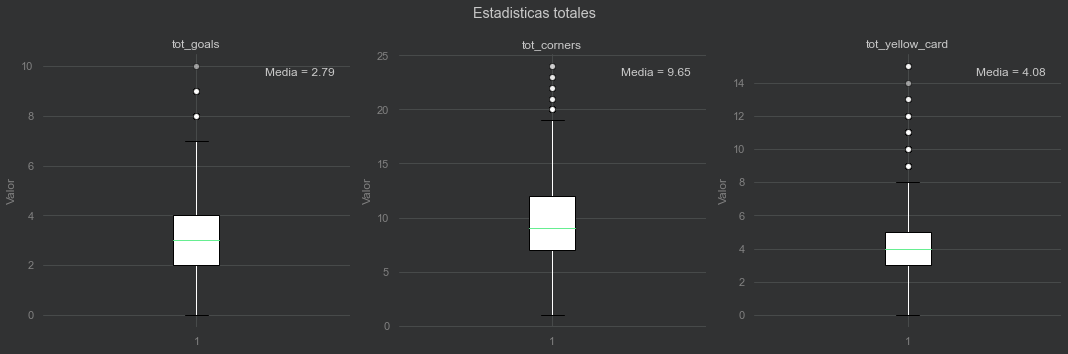

In [50]:
columnas = ['tot_goals','tot_corners','tot_yellow_card']
titulo = 'Estadisticas totales'
boxplot_sta1(df_modelo, columnas,titulo)

se observa una gran cantidad de outliers para los corners y las yellow cards, habra que eliminar valores atipicos

Ahora se analizaran los equipos en cuanto a las corners, Goals y Yellows Cards

In [59]:
def boxplot_multiple_columnas1(df_modelo, columnas, titulo):
    # Crear una figura y un solo subgráfico
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Crear los boxplots para cada columna
    bp = ax.boxplot(df_modelo[columnas], patch_artist=True)
    
    # Cambiar el color del relleno del boxplot
    for patch in bp['boxes']:
        patch.set(facecolor='white', edgecolor='black')
    
    # Cambiar el color del borde de los bigotes
    for whisker in bp['whiskers']:
        whisker.set(color='white')
    
    # Cambiar el color de los outliers
    for flier in bp['fliers']:
        flier.set(markerfacecolor='white', markeredgecolor='black', alpha=0.5)
    
    # Añadir el valor de la media como texto en el cuadrante superior derecho de cada boxplot
    for i, col in enumerate(columnas):
        media = df_modelo[col].mean()
        ax.text(i + 1, media, f'{media:.2f}', ha='left', va='bottom', color='r')
    
    # Añadir título y etiquetas
    ax.set_xticklabels(columnas, fontsize=12, fontweight='bold')  # Aumentar el tamaño y el peso de la fuente en el eje x
    ax.set_title(titulo, fontsize=16, fontweight='bold')  # Aumentar el tamaño y el peso de la fuente del título
    ax.set_ylabel('Valor', fontsize=12)
    
    # Cambiar el color de las líneas del eje y
    ax.spines['left'].set_color('grey')
    ax.spines['bottom'].set_color('grey')
    
    # Mostrar la gráfica
    plt.show()

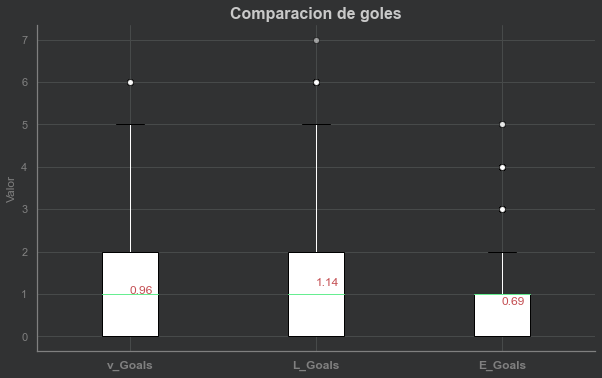

In [60]:
columnas = ['v_Goals','L_Goals','E_Goals']
titulo = 'Comparacion de goles'
boxplot_multiple_columnas1(df_modelo, columnas, titulo)

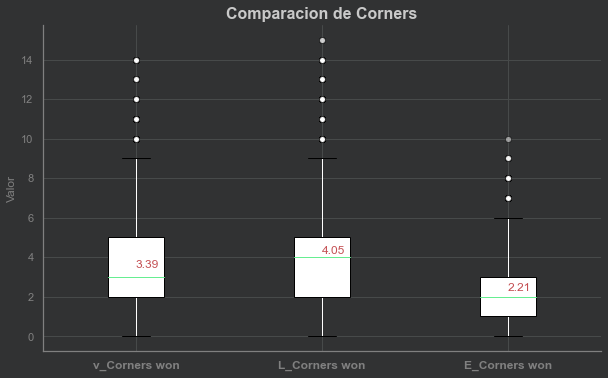

In [61]:
columnas = ['v_Corners won','L_Corners won','E_Corners won']
titulo = 'Comparacion de Corners'
boxplot_multiple_columnas1(df_modelo, columnas, titulo)

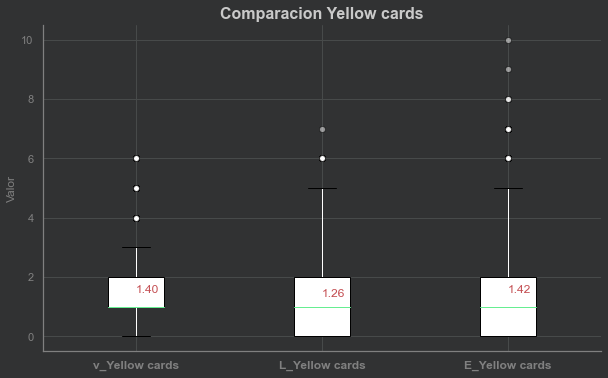

In [62]:
columnas = ['v_Yellow cards','L_Yellow cards','E_Yellow cards']
titulo = 'Comparacion Yellow cards'
boxplot_multiple_columnas1(df_modelo, columnas, titulo)

se encontraron mayores valores atipicos en los corners del qequipo local a su vez que en las tarjetas amarillas del minuto 70 a 90

A continuación se analizaran las etiquetas de corners, Goals y Yellow Cards desde  diferentes características de un partido.

In [65]:
def plot_histograms(df, title, columns,title_general):
    num_cols = len(columns)
    fig, axes = plt.subplots(1, num_cols, figsize=(15, 5)) 
    
    palette = sns.color_palette("hsv", num_cols)
    
    for i, column in enumerate(columns):
        axes[i].hist(df[column], bins=8, color=palette[i], edgecolor='black')
        axes[i].set_title(f'Histograma de {title}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Partidos')
    
    plt.suptitle(title_general)
    plt.tight_layout()
    plt.show()

In [66]:
def determinar_resultado(row):
    if row['L_Goals'] > row['v_Goals']:
        return 'VictoriaLocal'
    elif row['L_Goals'] < row['v_Goals']:
        return 'VictoriaVisitante'
    else:
        return 'Empate'

df_modelo['Resultado'] = df_modelo.apply(lambda row: determinar_resultado(row), axis=1)

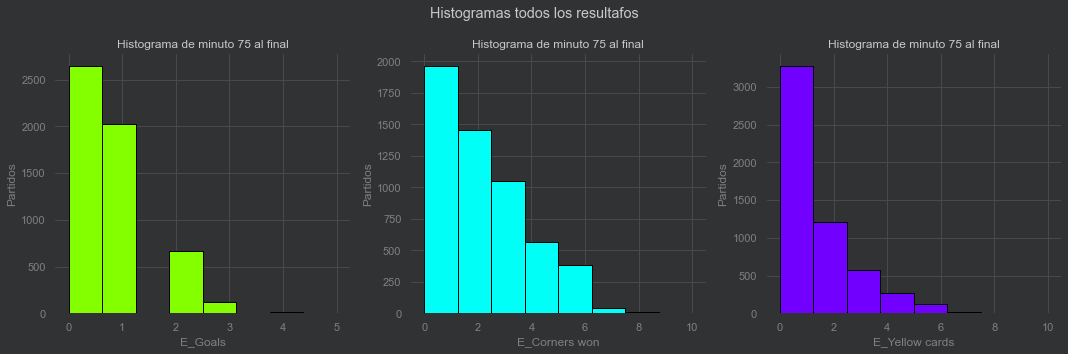

In [67]:
plot_histograms(df_modelo, 'minuto 75 al final', ['E_Goals','E_Corners won','E_Yellow cards'],'Histogramas todos los resultafos')

del minuto 75 a 90 se observa que hay bastante dispersión para los tiros de esquina concentrándose la mayoría de datos entre 0 y 3 tiros de esquina, lo cual es importante para la elección de la distribución de las etiquetas para el modelo final.

Ahora es importante analizar si los 4 mejores equipos de estas ligas marcan diferencias notables respecto a toda la población de los 20 equipos que hay en cada una de las ligas, esto puede servir para saber si estadísticamente hay grandes diferencias con lo que los datos de la posición de cada equipo y su localia en cada partido puede ser predominantes en el peso del modelo.

las siguientes graficas representan frecuencias del minuto 75 al final

In [31]:
df_filt_prime = df_modelo[(df_modelo['L_Posición'] >= 1) & (df_modelo['L_Posición'] <= 4)]

In [32]:
df_filt_prime_v = df_modelo[(df_modelo['v_Posición'] >= 1) & (df_modelo['L_Posición'] <= 4)]

filtro por granadores locales visitantes y empate

In [33]:
df_filt_prime_loc =  df_modelo[df_modelo['Resultado'] == 'VictoriaLocal']
df_filt_prime_vis =  df_modelo[df_modelo['Resultado'] == 'VictoriaVisitante']
df_filt_prime_emp =  df_modelo[df_modelo['Resultado'] == 'Empate']

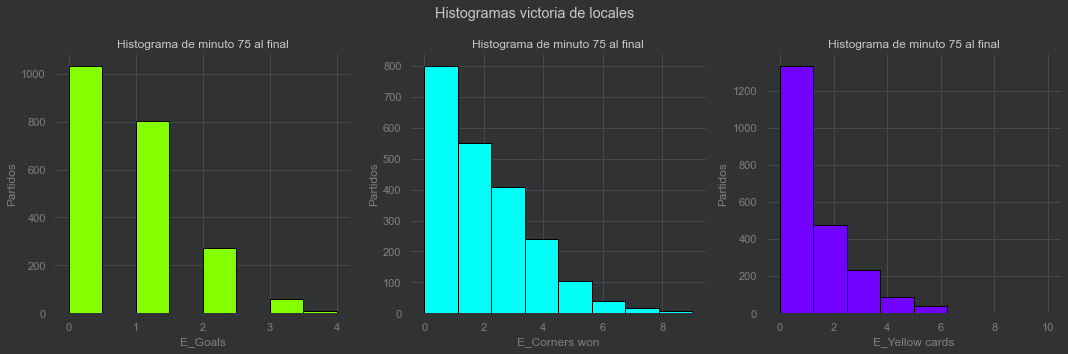

In [34]:
plot_histograms(df_filt_prime_loc, 'minuto 75 al final', ['E_Goals','E_Corners won','E_Yellow cards'],'Histogramas victoria de locales')

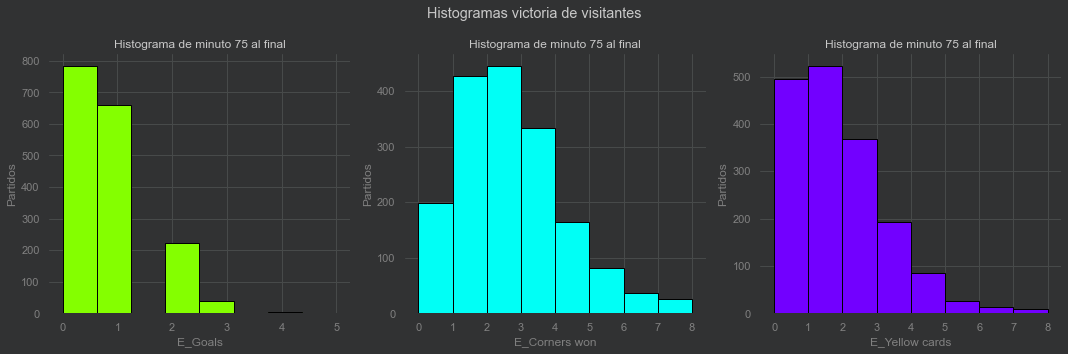

In [35]:
plot_histograms(df_filt_prime_vis, 'minuto 75 al final', ['E_Goals','E_Corners won','E_Yellow cards'],'Histogramas victoria de visitantes')

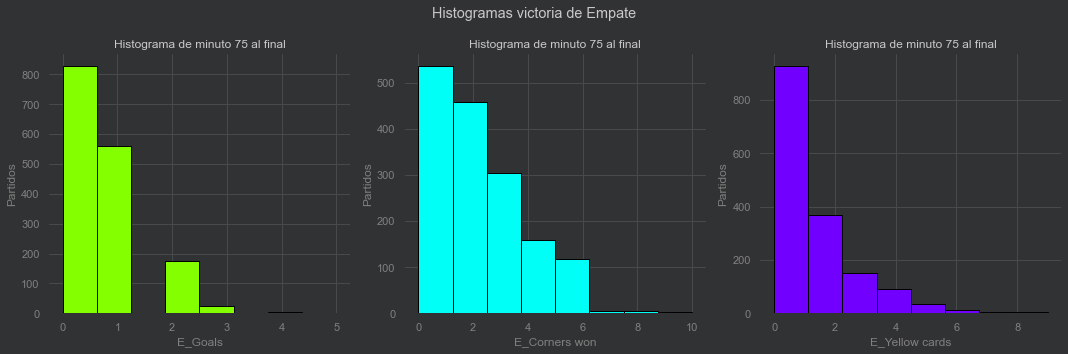

In [36]:
plot_histograms(df_filt_prime_emp, 'minuto 75 al final', ['E_Goals','E_Corners won','E_Yellow cards'],'Histogramas victoria de Empate')

Analizando los corners se puede observar que la mayor concentración de tiros de esquina esta entre 2 y 4 cuando el visitante va ganando entre el minuto 0 y 75 que difiere de la normalidad que es entre 0 y 2 tiros de esquina. esto tiene lógica en el mundo del futbol ya que si un equipo que va en las primeras posiciones tendera a atacar si va perdiendo en casa.

ahora se miraran los promedios teniendo en cuenta las consideraciones anteriores

In [37]:
def plot_multiple_bar_charts(df, title, columns):
    # Calcular el total de cada columna
    total_column_values = df.sum()
    
    # Inicializar el gráfico
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Iterar sobre las columnas
    for i, column in enumerate(columns):
        porcentajes_por_resultado = df.groupby('Resultado')[column].mean()
        # Crear el gráfico de barras
        axes[i].bar(porcentajes_por_resultado.index, porcentajes_por_resultado, color=['red', 'blue', 'green'])
        
        # Añadir etiquetas y título
        axes[i].set_xlabel('Resultado Minuto 1 al 75')
        axes[i].set_ylabel(f'Promedio de {column}')
        axes[i].set_title(f'Promedio de {column} del 75 al 90')  # Título específico para cada gráfico
        
        # Añadir rejilla
        axes[i].grid(True)
    
    # Título general para todas las gráficas
    plt.suptitle(title)
    
    # Ajustar diseño
    plt.tight_layout()
    
    # Mostrar el gráfico
    plt.show()


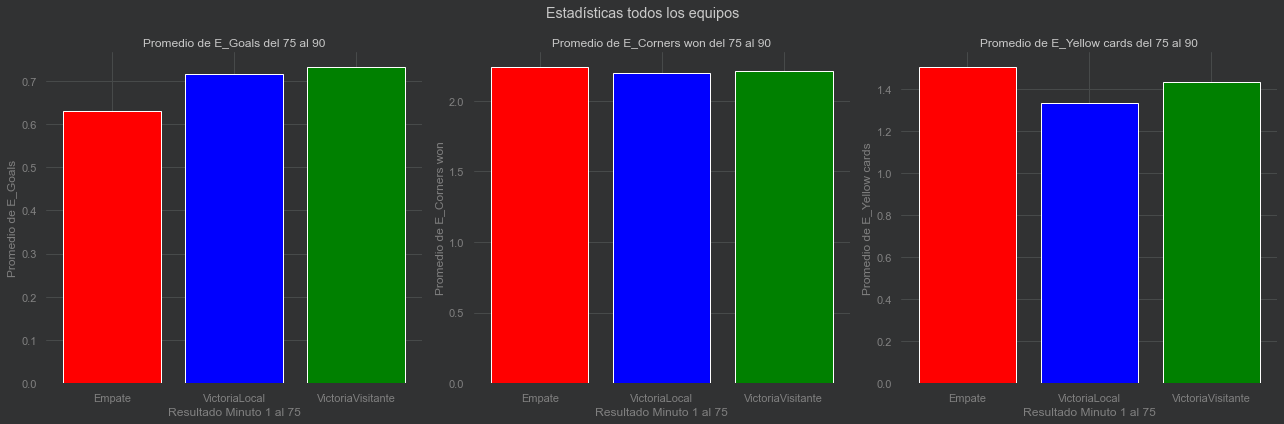

In [38]:
plot_multiple_bar_charts(df_modelo, 'Estadísticas todos los equipos', ['E_Goals', 'E_Corners won', 'E_Yellow cards'])

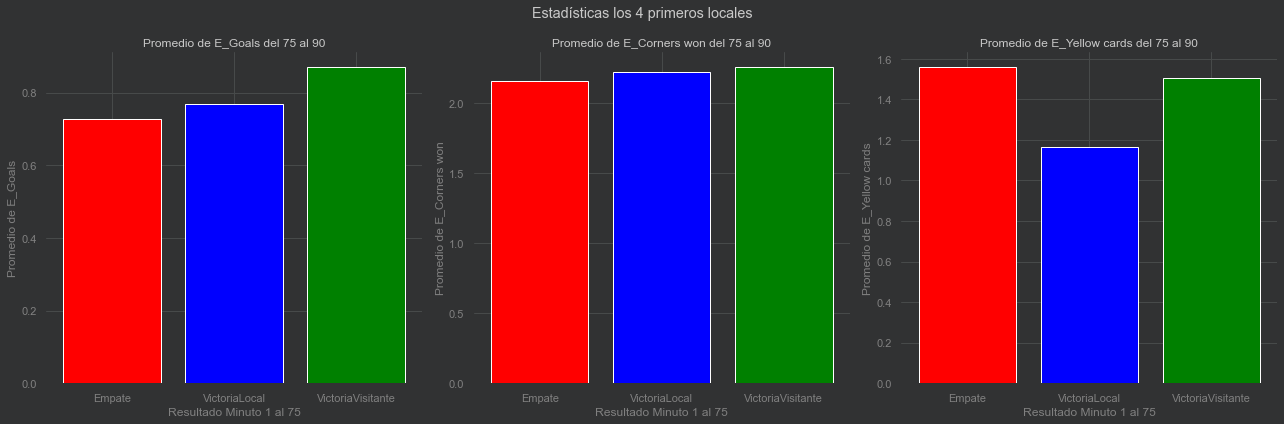

In [39]:
plot_multiple_bar_charts(df_filt_prime, 'Estadísticas los 4 primeros locales', ['E_Goals', 'E_Corners won', 'E_Yellow cards'])

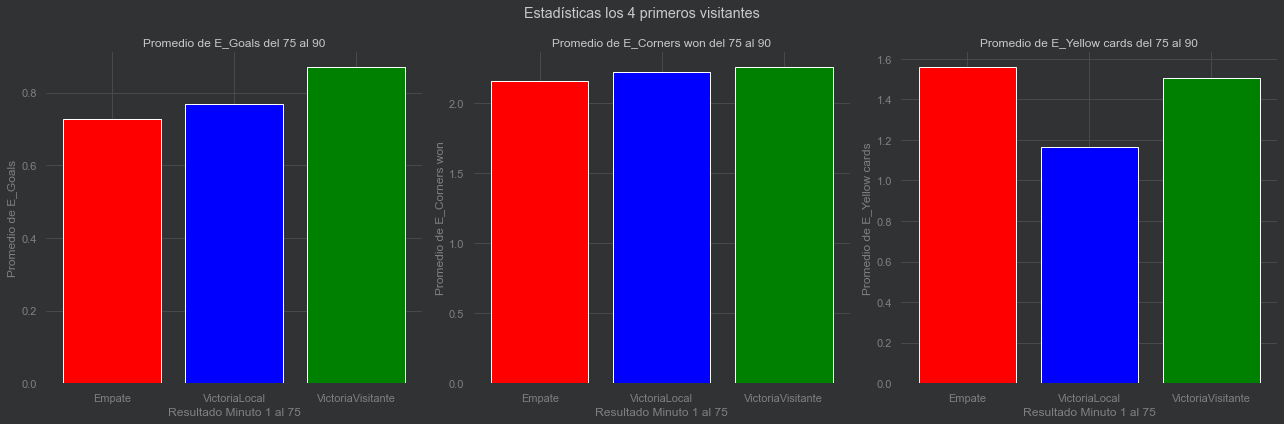

In [40]:
plot_multiple_bar_charts(df_filt_prime_v, 'Estadísticas los 4 primeros visitantes', ['E_Goals', 'E_Corners won', 'E_Yellow cards'])

se puede observar que son muy parecidos los promedios dados los diferentes escenarios por lo que es más conveniente para el modelo realizar una etiqueta con frecuencias y no con medias para que se puedan dar las diferencias.

## Correlaciones

A continuación se observaran las correlaciones entre las variables más importantes.

In [69]:
columnas_c = ['v_Goals', 'v_Assists', 'v_Red cards', 'v_Yellow cards',
       'v_Corners won', 'v_Shots',
       'v_Passes','v_minuto', 'v_localia', 'v_Posición',
       'v_Gol_Dif_acum', 'L_Goals', 'L_Assists', 'L_Red cards',
       'L_Yellow cards', 'L_Corners won', 'L_Shots',
       'L_Passes', 'L_Crosses','E_Goals','E_Yellow cards', 'E_Corners won','Resultado']

In [71]:
df_corr = df_modelo[columnas_c]

In [44]:
# Crear un pairplot
#sns.pairplot(df_corr)

# Mostrar el pairplot
#plt.show()

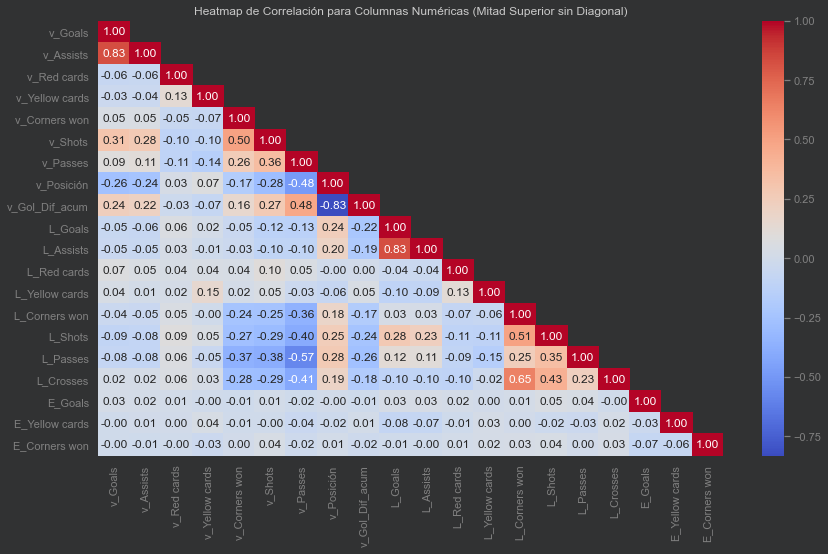

In [45]:
df_numeric = df_corr.select_dtypes(include=[np.number])
matriz_correlacion = df_numeric.corr()
# Crear una máscara para ocultar la mitad inferior y la diagonal
mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))
mask_diagonal = np.eye(matriz_correlacion.shape[0], dtype=bool)
mask_superior = mask & ~mask_diagonal
plt.figure(figsize=(14, 8))
sns.heatmap(matriz_correlacion, mask=mask_superior, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlación para Columnas Numéricas (Mitad Superior sin Diagonal)')
plt.show()

se observa una fuerte correlación entre asistencias y goles de visitantes, entre la posición y goles de diferencia acumulados lo cual es muy lógico ya que a mayor posición mayor gol diferencia. También entre corner y cruces lo cual es lógico ya que cuando se cruza en balón es posible que este se rechace y se produzca un corner.

In [72]:
def scatter_plot_with_labels(df, x_column, y_column):
    # Definir colores para cada columna
    colores = {'Empate': 'red', 'VictoriaVisitante': 'green', 'VictoriaLocal': 'blue'}
    colores_p = df.Resultado.map(colores)
    fig, ax = plt.subplots()
    ax.scatter(df[x_column], df[y_column], color=colores_p)
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)
    ax.set_title('Gráfico de Dispersión')
    for categoria, color in colores.items():
        ax.scatter([], [], color=color, label=categoria)
    ax.legend()

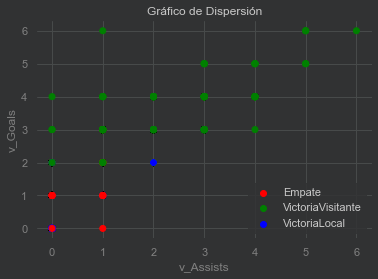

In [73]:
scatter_plot_with_labels(df_corr,'v_Assists', 'v_Goals')

In [ ]:
se observa una corrrelacion que se puede decir que en la mayoria de puntos es lineal positiva

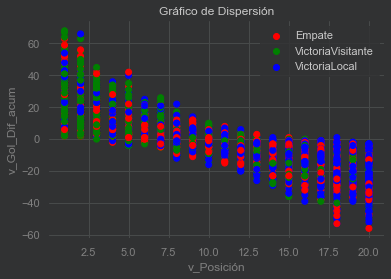

In [74]:
scatter_plot_with_labels(df_corr,'v_Posición', 'v_Gol_Dif_acum')

aquí se observa una dispersión que se acerca mucho a la linealidad negativa, las victorias de visitante preponderan en las primeras posiciones

## Construcción de etiquetas

Para este modelo se utilizara la etiqueta de corners como variable a predecir y se construirá de acuerdo a las frecuencias vistas anteriormente.

In [78]:
def asignar_valor_v1_(valor):
    if valor == 0:
        return '0 corners'
    elif valor == 1:
        return '1 corners'
    elif valor == 2:
        return '2 corners'
    elif valor >= 3:
        return 'mayor o igual 3 corners'

In [51]:
df_modelo['Eti_Corners_v1'] = df_modelo['E_Corners won'].apply(lambda x: asignar_valor_v1_(x))
df_modelo['Eti_Corners_v1'].value_counts()

Eti_Corners_v1
mayor o igual 3 corners    2057
2 corners                  1457
1 corners                  1310
0 corners                   653
Name: count, dtype: int64

In [81]:
def asignar_valor_v2(valor):
    if valor >= 0 and valor <= 1:
        return 'entre 0 y 1 corners'
    elif valor >= 2 and valor <= 3:
        return 'entre 2 y 3 corners'
    elif valor >= 4 and valor <= 5:
        return 'entre 4 y 5 corners'
    elif valor > 5:
        return 'mayor a 5'
    

In [82]:
df_modelo['Eti_Corners_v2'] = df_modelo['E_Corners won'].apply(asignar_valor_v2)
df_modelo['Eti_Corners_v2'].value_counts()

Eti_Corners_v2
entre 2 y 3 corners    2505
entre 0 y 1 corners    1963
entre 4 y 5 corners     836
mayor a 5               174
Name: count, dtype: int64

después de varias pruebas al finalizar el modelo el que mejor accuracy dio fua la versión 2 por lo tanto se realizara con esta versión.

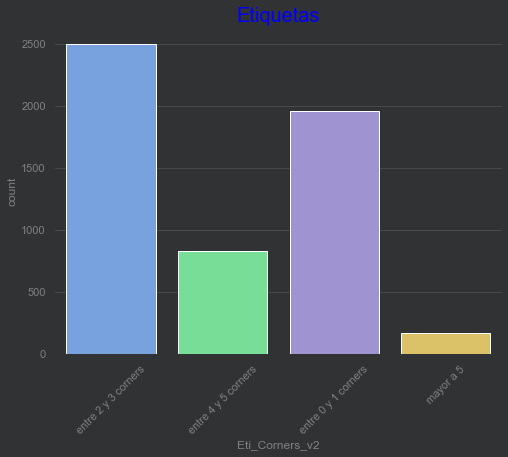

In [83]:
plt.figure(figsize=(8, 6))
sns.countplot(df_modelo['Eti_Corners_v2'])
plt.xticks(rotation=45)
plt.title('Etiquetas',color='blue', fontsize=20)
plt.show()

dado el inminente desbalanceo entre la misma se balancearan.

In [84]:
y_final = df_modelo['Eti_Corners_v2']

finalmente se seleccionaran las Features para el modelo

In [86]:
x_finales = ['v_Goals', 'v_Assists', 'v_Red cards', 'v_Yellow cards',
       'v_Corners won', 'v_Shots', 'v_Shots on target', 'v_Blocked shots',
       'v_Passes', 'v_Crosses', 'v_Tackles', 'v_Offsides', 'v_Fouls conceded',
       'v_Fouls won','v_Posición','v_Gol_Dif_acum', 
       'L_Goals', 'L_Assists', 'L_Red cards',
       'L_Yellow cards', 'L_Corners won', 'L_Shots', 'L_Shots on target',
       'L_Blocked shots', 'L_Passes', 'L_Crosses', 'L_Tackles', 'L_Offsides',
       'L_Fouls conceded', 'L_Fouls won','L_Posición','L_Gol_Dif_acum']

In [87]:
X_final = df_modelo[x_finales]

se realizaran algunos análisis antes de tener la versión final de las features

In [58]:
X_final.columns

Index(['v_Goals', 'v_Assists', 'v_Red cards', 'v_Yellow cards',
       'v_Corners won', 'v_Shots', 'v_Shots on target', 'v_Blocked shots',
       'v_Passes', 'v_Crosses', 'v_Tackles', 'v_Offsides', 'v_Fouls conceded',
       'v_Fouls won', 'v_Posición', 'v_Gol_Dif_acum', 'L_Goals', 'L_Assists',
       'L_Red cards', 'L_Yellow cards', 'L_Corners won', 'L_Shots',
       'L_Shots on target', 'L_Blocked shots', 'L_Passes', 'L_Crosses',
       'L_Tackles', 'L_Offsides', 'L_Fouls conceded', 'L_Fouls won',
       'L_Posición', 'L_Gol_Dif_acum'],
      dtype='object')

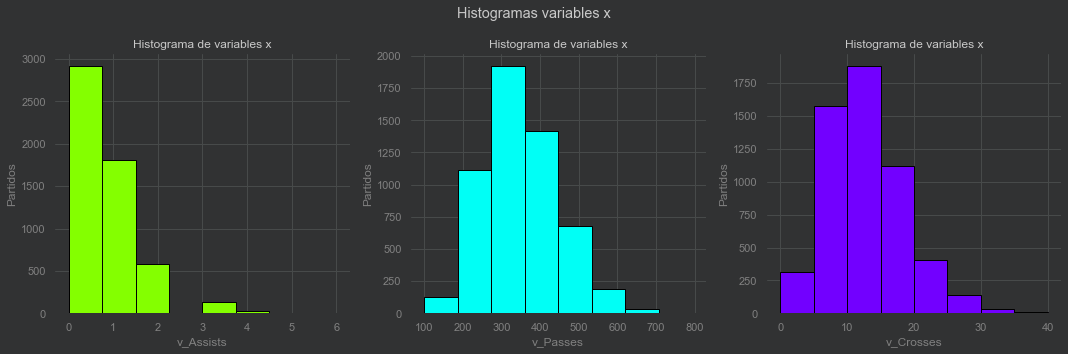

In [59]:
plot_histograms(X_final, 'variables x', ['v_Assists','v_Passes','v_Crosses'],'Histogramas variables x')

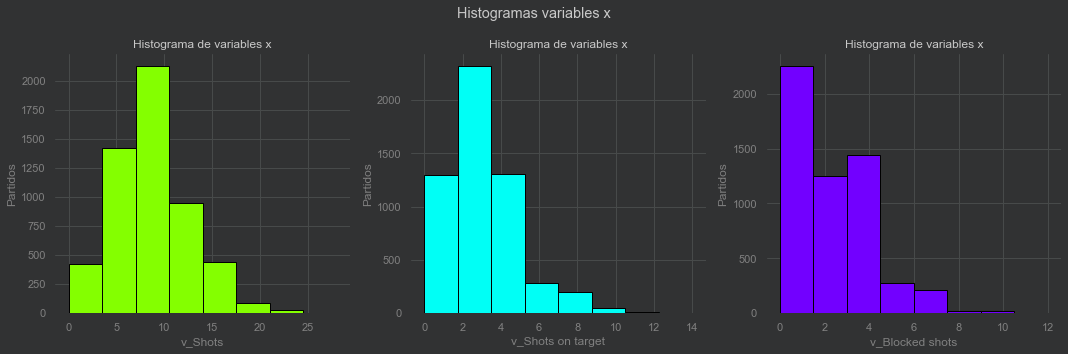

In [60]:
plot_histograms(X_final, 'variables x', ['v_Shots','v_Shots on target','v_Blocked shots'],'Histogramas variables x')

dado que hay demasiada dispersión en las features de pases ('v_Passes', 'v_Crosses') ya que la cantidad de pases en un partido puede variar mucho se sacaran porcentajes sobre el total para así ayudar al modelo a realizar cálculos a los datos de una mejor forma.

In [89]:
X_final['v_Passes_porc'] = X_final['v_Passes']/(X_final['v_Passes']+X_final['L_Passes']) 

In [90]:
X_final['L_Passes_porc'] = X_final['L_Passes']/(X_final['v_Passes']+X_final['L_Passes']) 

In [91]:
X_final['v_Crosses_porc'] = X_final['v_Crosses']/(X_final['v_Crosses']+X_final['L_Crosses']) 

In [92]:
X_final['L_Crosses_porc'] = X_final['L_Crosses']/(X_final['v_Crosses']+X_final['L_Crosses']) 

In [93]:
X_final = X_final.drop(columns=['v_Passes', 'L_Passes','v_Crosses','L_Crosses']).reset_index(drop=True)

las Features finales para el modelo son las siguientes

In [94]:
X_final.columns

Index(['v_Goals', 'v_Assists', 'v_Red cards', 'v_Yellow cards',
       'v_Corners won', 'v_Shots', 'v_Shots on target', 'v_Blocked shots',
       'v_Tackles', 'v_Offsides', 'v_Fouls conceded', 'v_Fouls won',
       'v_Posición', 'v_Gol_Dif_acum', 'L_Goals', 'L_Assists', 'L_Red cards',
       'L_Yellow cards', 'L_Corners won', 'L_Shots', 'L_Shots on target',
       'L_Blocked shots', 'L_Tackles', 'L_Offsides', 'L_Fouls conceded',
       'L_Fouls won', 'L_Posición', 'L_Gol_Dif_acum', 'v_Passes_porc',
       'L_Passes_porc', 'v_Crosses_porc', 'L_Crosses_porc'],
      dtype='object')

## Tratamiento de valores atípicos

cómo se observó en boxplot anteriores es necesario reducir valores atípicos para que el modelo tenga un mejor comportamiento.

In [96]:
def count_outliers_per_column(df):
    # Seleccionar solo las columnas numéricas
    numeric_columns = df.select_dtypes(include=['int', 'float']).columns
    
    # Calcular el rango intercuartílico (IQR) solo para las columnas numéricas
    Q1 = df[numeric_columns].quantile(0.25)
    Q3 = df[numeric_columns].quantile(0.75)
    IQR = Q3 - Q1

    # Definir el límite inferior y superior para identificar valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar valores atípicos
    outliers = (df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)

    # Contar valores atípicos por columna
    outliers_count_per_column = outliers.sum()

    return outliers_count_per_column

In [97]:
count_outliers_per_column(X_final)

v_Goals                5
v_Assists            170
v_Red cards          280
v_Yellow cards       222
v_Corners won         74
v_Shots               83
v_Shots on target    135
v_Blocked shots      113
v_Tackles             38
v_Offsides            45
v_Fouls conceded      71
v_Fouls won           36
v_Posición             0
v_Gol_Dif_acum       364
L_Goals               13
L_Assists            282
L_Red cards          243
L_Yellow cards         9
L_Corners won        159
L_Shots               50
L_Shots on target     52
L_Blocked shots       53
L_Tackles             41
L_Offsides            60
L_Fouls conceded      54
L_Fouls won           46
L_Posición             0
L_Gol_Dif_acum       359
v_Passes_porc          1
L_Passes_porc          1
v_Crosses_porc         0
L_Crosses_porc         0
dtype: int64


la feature con más valores atípicos 'L_Gol_Dif_acum'  alrededor del 6.5%, se realizara un tratamiento de estos datos remplazando el valor atípico por la media de la feature.

In [102]:
def replace_outliers_with_mean(df):
    # Itera sobre cada columna del DataFrame
    for column in df.columns:
        # Calcula el rango intercuartílico (IQR)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calcula los límites inferior y superior
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Reemplaza los valores atípicos por la media de la columna
        df[column] = df[column].mask((df[column] < lower_bound) | (df[column] > upper_bound), df[column].mean())
    
    return df

In [103]:
X_final_sin_atip = replace_outliers_with_mean(X_final)

In [104]:
count_outliers_per_column(X_final_sin_atip)

v_Goals              420
v_Assists              0
v_Red cards          280
v_Yellow cards         0
v_Corners won          0
v_Shots                0
v_Shots on target      0
v_Blocked shots        0
v_Tackles              0
v_Offsides             0
v_Fouls conceded       0
v_Fouls won            0
v_Posición             0
v_Gol_Dif_acum       262
L_Goals                0
L_Assists              0
L_Red cards          243
L_Yellow cards         0
L_Corners won          0
L_Shots                0
L_Shots on target      0
L_Blocked shots        0
L_Tackles              0
L_Offsides             0
L_Fouls conceded       0
L_Fouls won            0
L_Posición             0
L_Gol_Dif_acum       261
v_Passes_porc          0
L_Passes_porc          0
v_Crosses_porc         0
L_Crosses_porc         0
dtype: int64

se observa la disminucion notable de los mismos

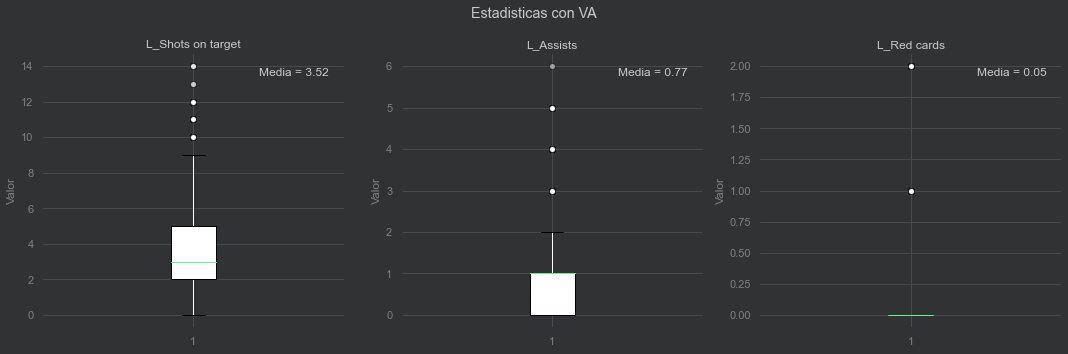

In [101]:
columnas = ['L_Shots on target','L_Assists','L_Red cards']
titulo = 'Estadisticas con VA'
boxplot_sta1(X_final, columnas,titulo)

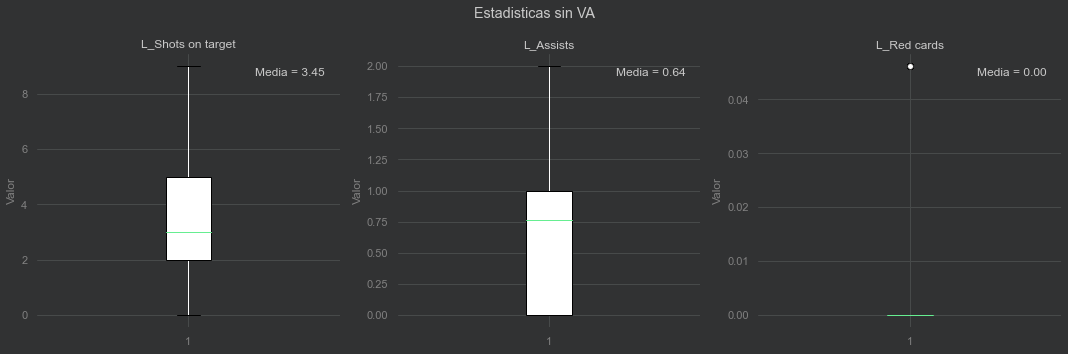

In [106]:
columnas = ['L_Shots on target','L_Assists','L_Red cards']
titulo = 'Estadisticas sin VA'
boxplot_sta1(X_final_sin_atip, columnas,titulo)

cómo se observa para el análisis de las 3 variables anteriores se eliminaron  valores atípicos

## Balanceo de Etiquetas

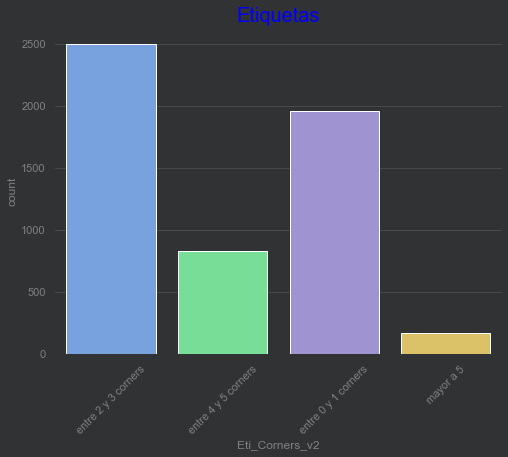

In [108]:
plt.figure(figsize=(8, 6))
sns.countplot(df_modelo['Eti_Corners_v2'])
plt.xticks(rotation=45)
plt.title('Etiquetas',color='blue', fontsize=20)
plt.show()

dado el eminente desbalanceo de etiquetas que para un modelo de clasificación causaría más aprendizaje en algunas etiquetas más que en otras es necesario balancear

In [110]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(random_state=42)
X_over, y_over = oversample.fit_resample(X_final_sin_atip,y_final)

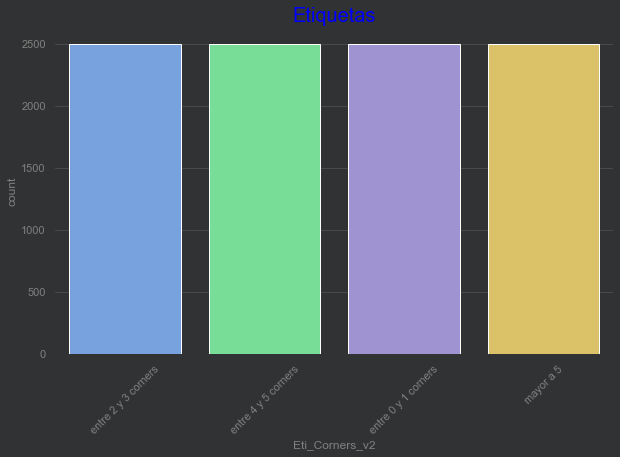

In [111]:
plt.figure(figsize=(10, 6))
sns.countplot(y_over)
plt.xticks(rotation=45)
plt.title('Etiquetas',color='blue', fontsize=20)
plt.show()

cómo se observa se llevaron las etiquetas de pocos datos hasta la de mayor cantidad de datos

## Aplicación Modelo Clasificador

se procedera a encontrar el mejor modelo a aplicar

## Escalamiento de datos 

se procede a realizar el escalamiento de los datos

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over,random_state= 42,shuffle=True,test_size=.2)
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.fit_transform( X_test)

## Modelo simple y multiclase

In [75]:
def logistic_model(C_,solver_,multiclass_):
    Logistic_regression_model = LogisticRegression(random_state=42,solver=solver_,multi_class=multiclass_,n_jobs=1,C=C_)
    return Logistic_regression_model

In [76]:
model = logistic_model(1,'saga','multinomial')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[109 117 135 151]
 [104 109 135 152]
 [ 96 112 135 143]
 [ 95  68 110 233]]
0.29241516966067865


es una accuracy demasiado bajo se intentara probar diferentes clases y listas con el fin de mejorarlo

In [77]:
multiclass = ['ovr','multinomial']
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
scores = []
params=[]
for i in multiclass:
    for j in solver_list:
        try:
            model = logistic_model(1,j,i)
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            params.append(i + '-'+ j)
            accuraccy = accuracy_score(y_test,predictions)
            scores.append(accuraccy)
        except:
            None 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'ovr-liblinear'),
  Text(1, 0, 'ovr-newton-cg'),
  Text(2, 0, 'ovr-lbfgs'),
  Text(3, 0, 'ovr-sag'),
  Text(4, 0, 'ovr-saga'),
  Text(5, 0, 'multinomial-newton-cg'),
  Text(6, 0, 'multinomial-lbfgs'),
  Text(7, 0, 'multinomial-sag'),
  Text(8, 0, 'multinomial-saga')])

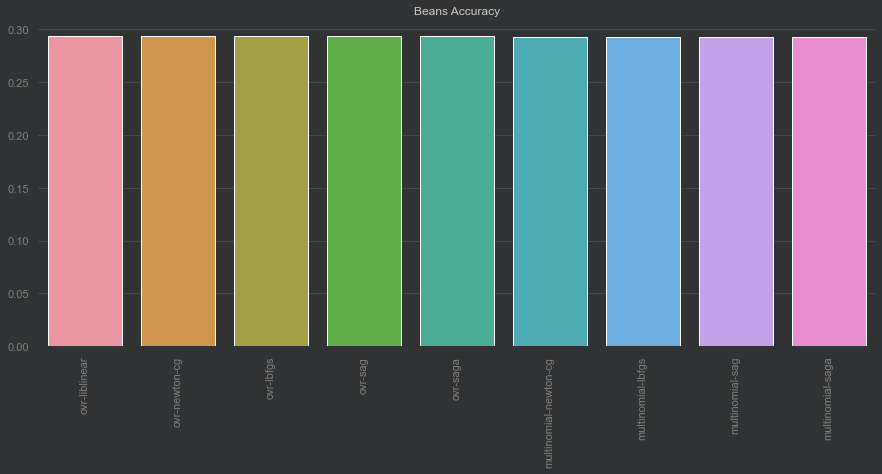

In [78]:
fig = plt.figure(figsize=(15,6))
sns.barplot(x=params,y=scores).set_title('Beans Accuracy')
plt.xticks(rotation=90)

en todos los casos se evidencia un accuracy muy parecido por lo que es necesario probar otros modelos y optimizaciones.Se probaran 6 diferentes modelos con diferentes parámetros optimizándooslos con el método de ensamble Baggin Classifier

## Modelos robustos con ensamble 

se probaran diferentes modelos robustos probando diferentes parametros hasta encontrar el mejor.

In [79]:
 estimators = {
        'LogisticRegression' : LogisticRegression(),
        'SVC' : SVC(),
        'LinearSVC' : LinearSVC(),
        'SGD' : SGDClassifier(loss="hinge", penalty="l2", max_iter=5),
        'DecisionTreeClf' : DecisionTreeClassifier(),
        'RandomTreeForest' : RandomForestClassifier(random_state=0)
    }

In [80]:
for name, estimator in estimators.items():
    bag_class = BaggingClassifier(base_estimator=estimator, n_estimators=50).fit(X_train, y_train)
    bag_predict = bag_class.predict(X_test)
    print('='*64)
    print('SCORE Bagging with {} : {}'.format(name, accuracy_score(bag_predict, y_test)))

SCORE Bagging with LogisticRegression : 0.2894211576846307
SCORE Bagging with SVC : 0.6112774451097804
SCORE Bagging with LinearSVC : 0.2944111776447106
SCORE Bagging with SGD : 0.28293413173652693
SCORE Bagging with DecisionTreeClf : 0.7559880239520959
SCORE Bagging with RandomTreeForest : 0.7764471057884231


Dados los resultados se escoge el clasificador DecisionTreeClf dado que presento los mejores resultadoS

Ahora se optimizara el valor de los estimadores

el estimador es: 10 con accuracy de 0
el estimador es: 25 con accuracy de 0
el estimador es: 40 con accuracy de 0
el estimador es: 55 con accuracy de 0
el estimador es: 70 con accuracy de 4
el estimador es: 85 con accuracy de 4
el estimador es: 100 con accuracy de 6
el estimador es: 115 con accuracy de 6
el estimador es: 130 con accuracy de 6
el estimador es: 145 con accuracy de 6
el estimador es: 160 con accuracy de 6
el estimador es: 175 con accuracy de 6
el estimador es: 190 con accuracy de 6
el estimador es: 205 con accuracy de 6


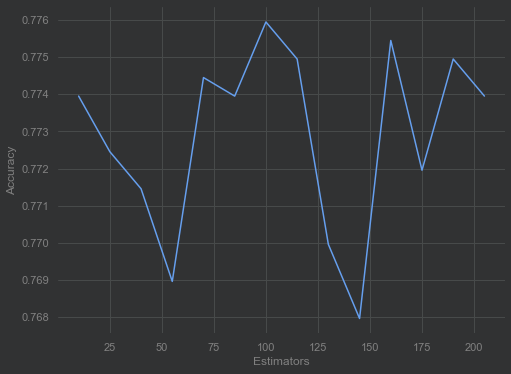

<Figure size 432x288 with 0 Axes>

In [81]:
bag_class = BaggingClassifier(RandomForestClassifier(random_state=0), n_estimators=50).fit(X_train, y_train)
bag_predict = bag_class.predict(X_test)

estimators = range(10, 220, 15)
df_accuracy = pd.DataFrame(columns=['accuracy', 'estimador'])
for i in estimators:
    bag_class = BaggingClassifier(RandomForestClassifier(random_state=0), n_estimators=i).fit(X_train, y_train)
    bag_predict = bag_class.predict(X_test)
    
    data_row = {
        'accuracy': accuracy_score(y_test, bag_predict),
        'estimador': i 
    }

    df_accuracy = pd.concat([df_accuracy, pd.DataFrame([data_row])], ignore_index=True)
   
    
    indice_max = df_accuracy['accuracy'].idxmax()
    print(f'el estimador es: {i} con accuracy de {indice_max}')

df_accuracy    
plt.figure(figsize=(8, 6))
plt.plot(df_accuracy['estimador'].to_numpy(), df_accuracy['accuracy'].to_numpy())
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.show()
plt.savefig('Boost.png')    

In [82]:
df_accuracy.loc[df_accuracy['accuracy'].idxmax()]

accuracy     0.775948
estimador         100
Name: 6, dtype: object

el mejor estimador posible es 100 estimadores alcanzando un accuracy de 0.77

## Aplicando Modelo Optimo Encontrado

Dado los parametros encontrados se entrenara modelo

In [85]:
model_final = BaggingClassifier(RandomForestClassifier(random_state=0), n_estimators=100).fit(X_train, y_train)
model_final.fit(X_train, y_train)
predictions = model_final.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[279 226   7   0]
 [138 339  22   1]
 [ 22  38 426   0]
 [  0   0   0 506]]
0.7734530938123753


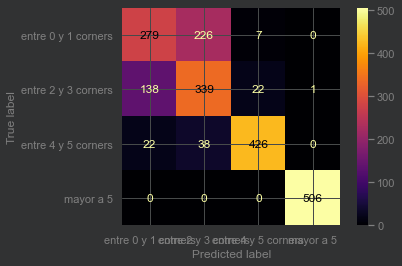

In [86]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='inferno')
plt.show()

## Conclusiones

- El aplicar modelos robustos hace que el accuracy mejore notablemente, aunque el tiempo que y los recursos de maquina que consumen son muy altos respecto a si solo se aplica el modelo simple.


- El mejor modelo para este caso entre los Robustos es el Bagging with RandomTreeForest Casi igual a DecisionTreeClf pero mucho mejor que los demás modelos.


- Aunque el accuracy general final de 0.77 es muy bueno, si se compara con la matriz de confusión dista mucho de buenos resultados ya que las mayores aciertos los fueron en etiquetas mayores a 4 corners donde como se vio en la distribución de las mismas estas ultimas son muy pocos registros y los mismos se balancearon al mayor valor. Hay muchos falsos positivos en las demás habrá que trabajar más para mejorar el modelo.